# Explore here

In [3]:
import pandas as pd


url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
import os

output_dir = 'data/raw'
os.makedirs(output_dir, exist_ok=True)

df.to_csv(f'{output_dir}/AB_NYC_2019.csv', index=False)

print(f'Dataset stored as {output_dir}/AB_NYC_2019.csv')

Dataset stored as data/raw/AB_NYC_2019.csv


### Exploratory Data Analysis

In [5]:
df.shape


(48895, 16)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
df.iloc[5]

id                                                                     5099
name                              Large Cozy 1 BR Apartment In Midtown East
host_id                                                                7322
host_name                                                             Chris
neighbourhood_group                                               Manhattan
neighbourhood                                                   Murray Hill
latitude                                                           40.74767
longitude                                                           -73.975
room_type                                                   Entire home/apt
price                                                                   200
minimum_nights                                                            3
number_of_reviews                                                        74
last_review                                                      2019-06-22
reviews_per_

In [10]:
df.isnull().sum(axis=0)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Duplicate Investigation

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.drop(["id","host_id","name", "host_name"],axis=1).duplicated().sum()

np.int64(0)

### Dropping UnNess- Parameters

In [13]:

missing_values = df.isnull().sum()

missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data

,Missing Values,Percentage
id,0,0.000000
name,16,0.032723
host_id,0,0.000000
host_name,21,0.042949
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
price,0,0.000000


In [14]:

threshold = 20


columns_to_drop = missing_percentage[missing_percentage > threshold].index


df = df.drop(columns=columns_to_drop)

print(f"Following columns were dropped: {list(columns_to_drop)}")

Following columns were dropped: ['last_review', 'reviews_per_month']


In [15]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  calculated_host_listings_count  

### Analysis of Univariate Variables

##### Categorical Variable Analysis

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  calculated_host_listings_count  


Cat: neighbourhood_group, neighbourhood, room_type

Num: price	minimum_nights	number_of_reviews calculated_host_listings_count	availability_365

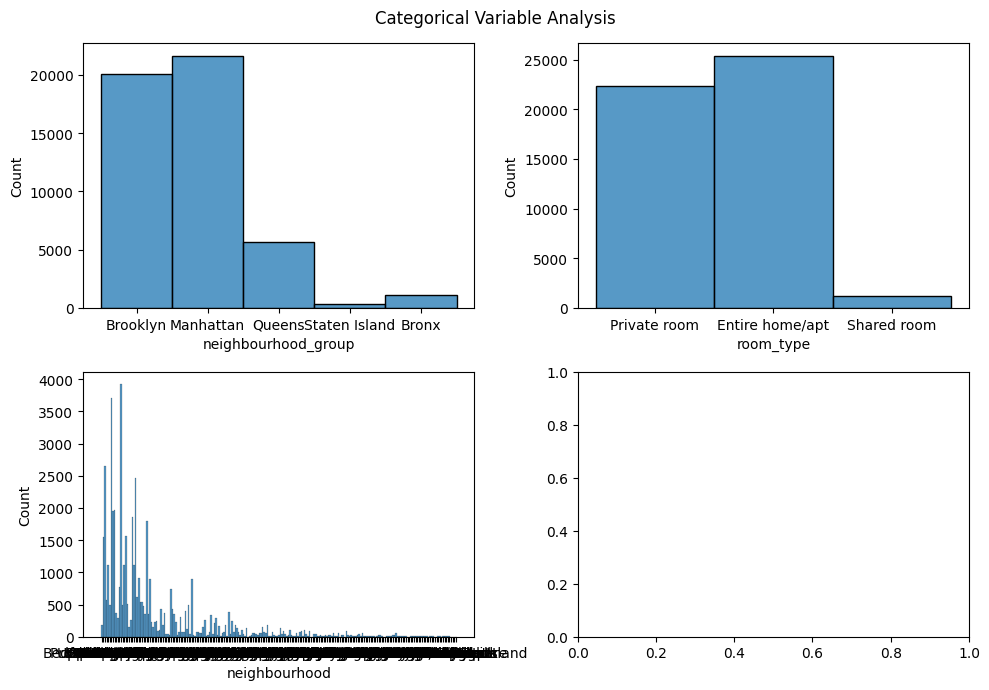

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']

fig, axis = plt.subplots(2, 2, figsize = (10, 7))


sns.histplot(ax = axis[0, 0], data = df, x = "neighbourhood_group")
sns.histplot(ax = axis[1, 0], data = df, x = "neighbourhood")
sns.histplot(ax = axis[0, 1], data = df, x = "room_type")


plt.suptitle("Categorical Variable Analysis")
plt.tight_layout()


plt.show()

#### Numerical Variable Analysis

Num: price	minimum_nights	number_of_reviews calculated_host_listings_count	availability_365

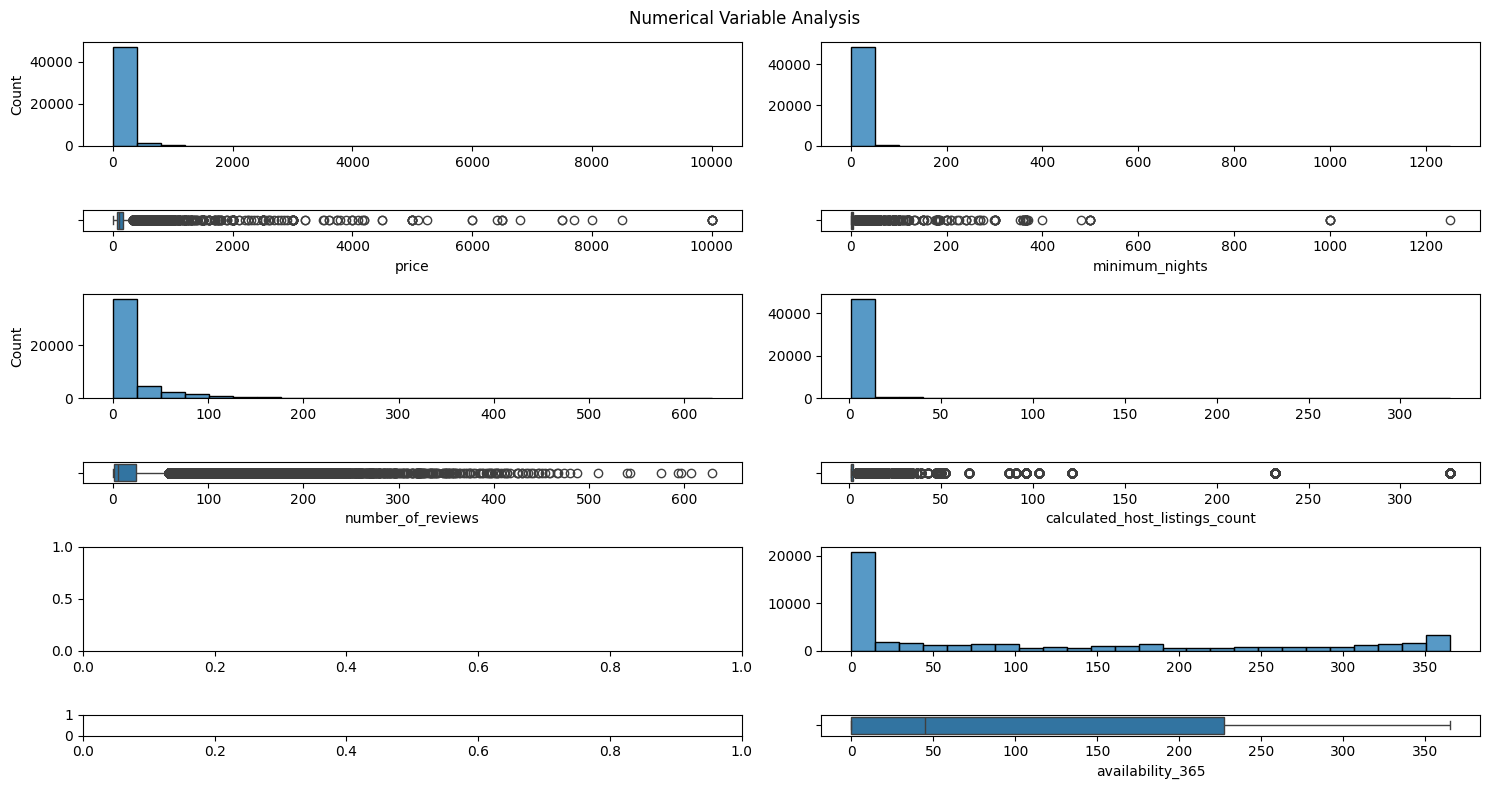

In [18]:
numerical_features = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']

fig, axis = plt.subplots(6, 2, figsize = (15, 8), gridspec_kw={'height_ratios': [5, 1, 5, 1, 5, 1]})


sns.histplot(ax = axis[0, 0], data = df, x = "price",bins=25).set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "price")
sns.histplot(ax = axis[0, 1], data = df, x = "minimum_nights",bins=25).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")
sns.histplot(ax = axis[2, 0], data = df, x = "number_of_reviews",bins=25).set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "number_of_reviews")
sns.histplot(ax = axis[2, 1], data = df, x = "calculated_host_listings_count",bins=25).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "calculated_host_listings_count")
sns.histplot(ax = axis[4, 1], data = df, x = "availability_365",bins=25).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 1], data = df, x = "availability_365")


plt.suptitle("Numerical Variable Analysis")
plt.tight_layout()


plt.show()

### Log Transformation

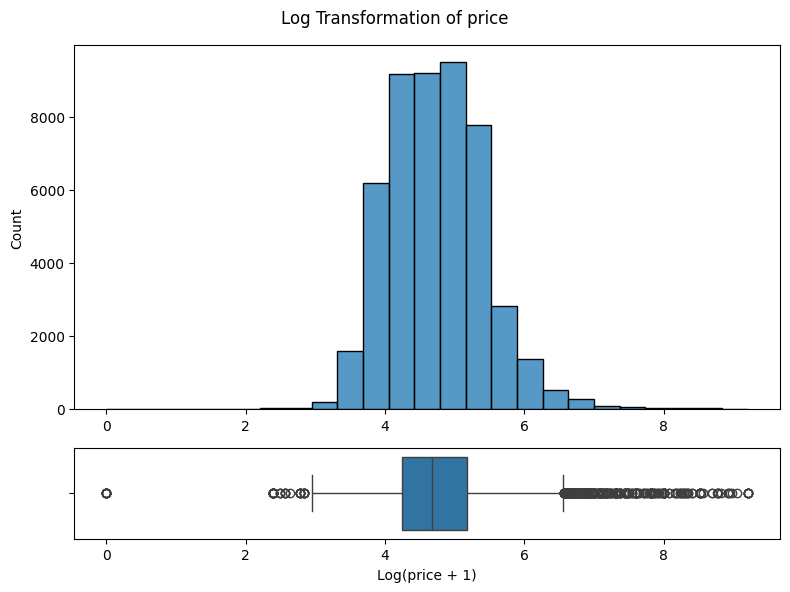

In [19]:
import numpy as np


fig, axis = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [4, 1]})


sns.histplot(np.log1p(df['price']), bins=25, ax=axis[0]).set(xlabel = None)
sns.boxplot(x=np.log1p(df['price']), ax=axis[1])
axis[1].set_xlabel('Log(price + 1)')


plt.suptitle("Log Transformation of price")
plt.tight_layout()
plt.show()

In [20]:
numerical_features

['price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365']

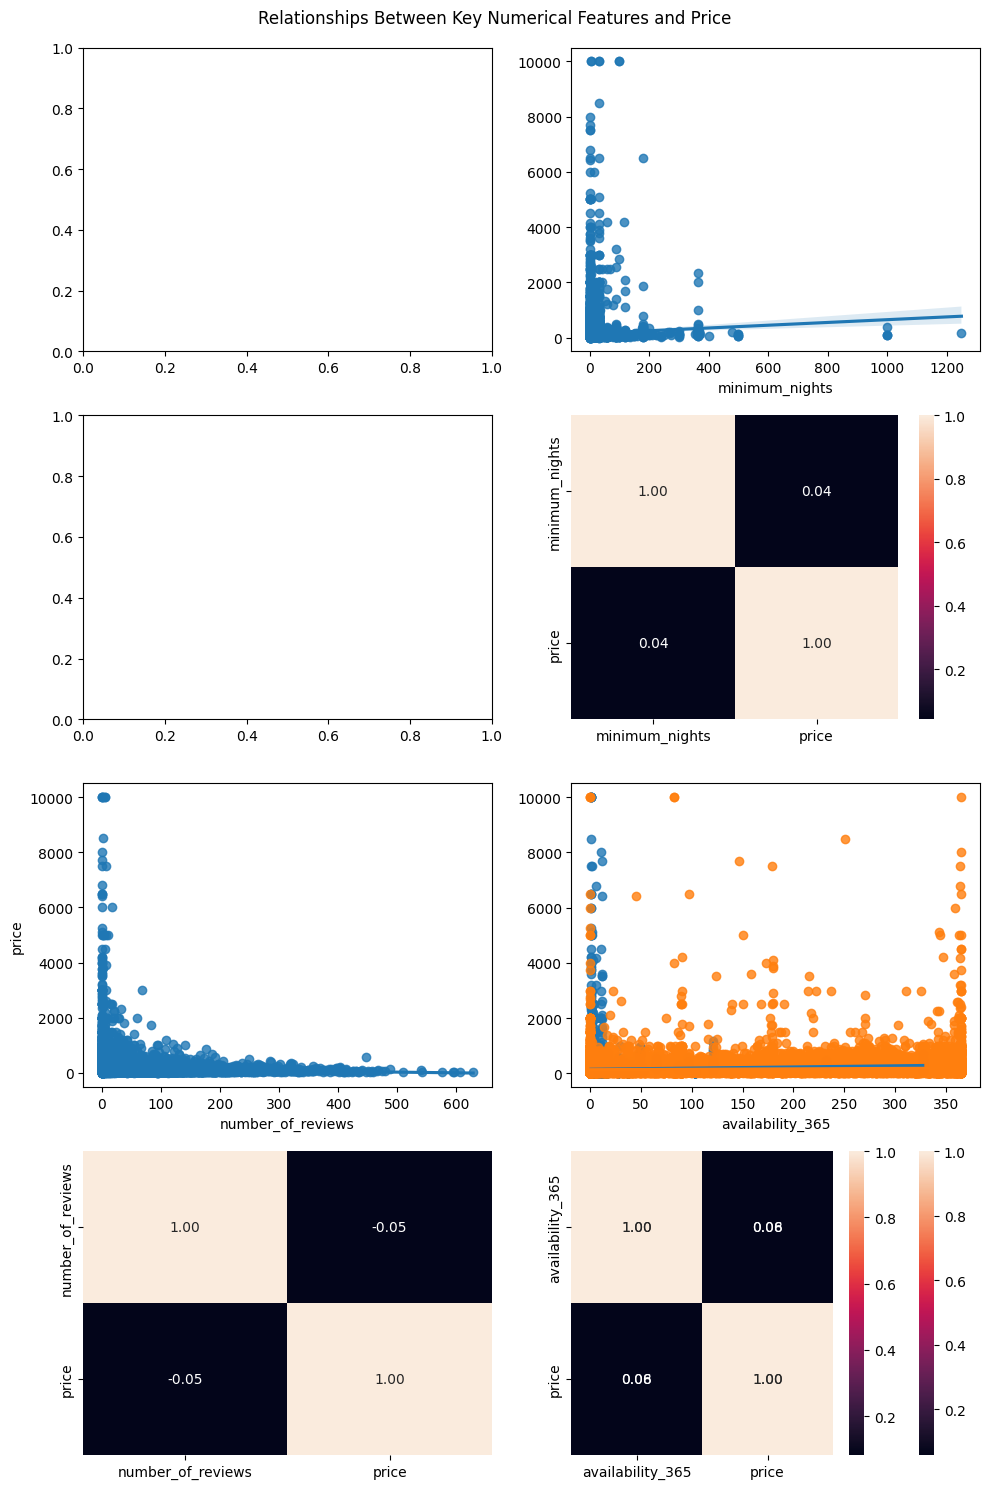

In [21]:
fig, axis = plt.subplots(4, 2, figsize = (10, 15))


sns.regplot(ax = axis[0, 1], data = df, x = "minimum_nights", y = "price").set(ylabel=None)
sns.heatmap(df[["minimum_nights", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "number_of_reviews", y = "price")
sns.heatmap(df[["number_of_reviews", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar=False)

sns.regplot(ax = axis[2, 1], data = df, x = "calculated_host_listings_count", y = "price").set(ylabel=None)
sns.heatmap(df[["calculated_host_listings_count", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

sns.regplot(ax = axis[2, 1], data = df, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(df[["availability_365", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

plt.suptitle("Relationships Between Key Numerical Features and Price", y=0.99)
plt.tight_layout()


plt.show()

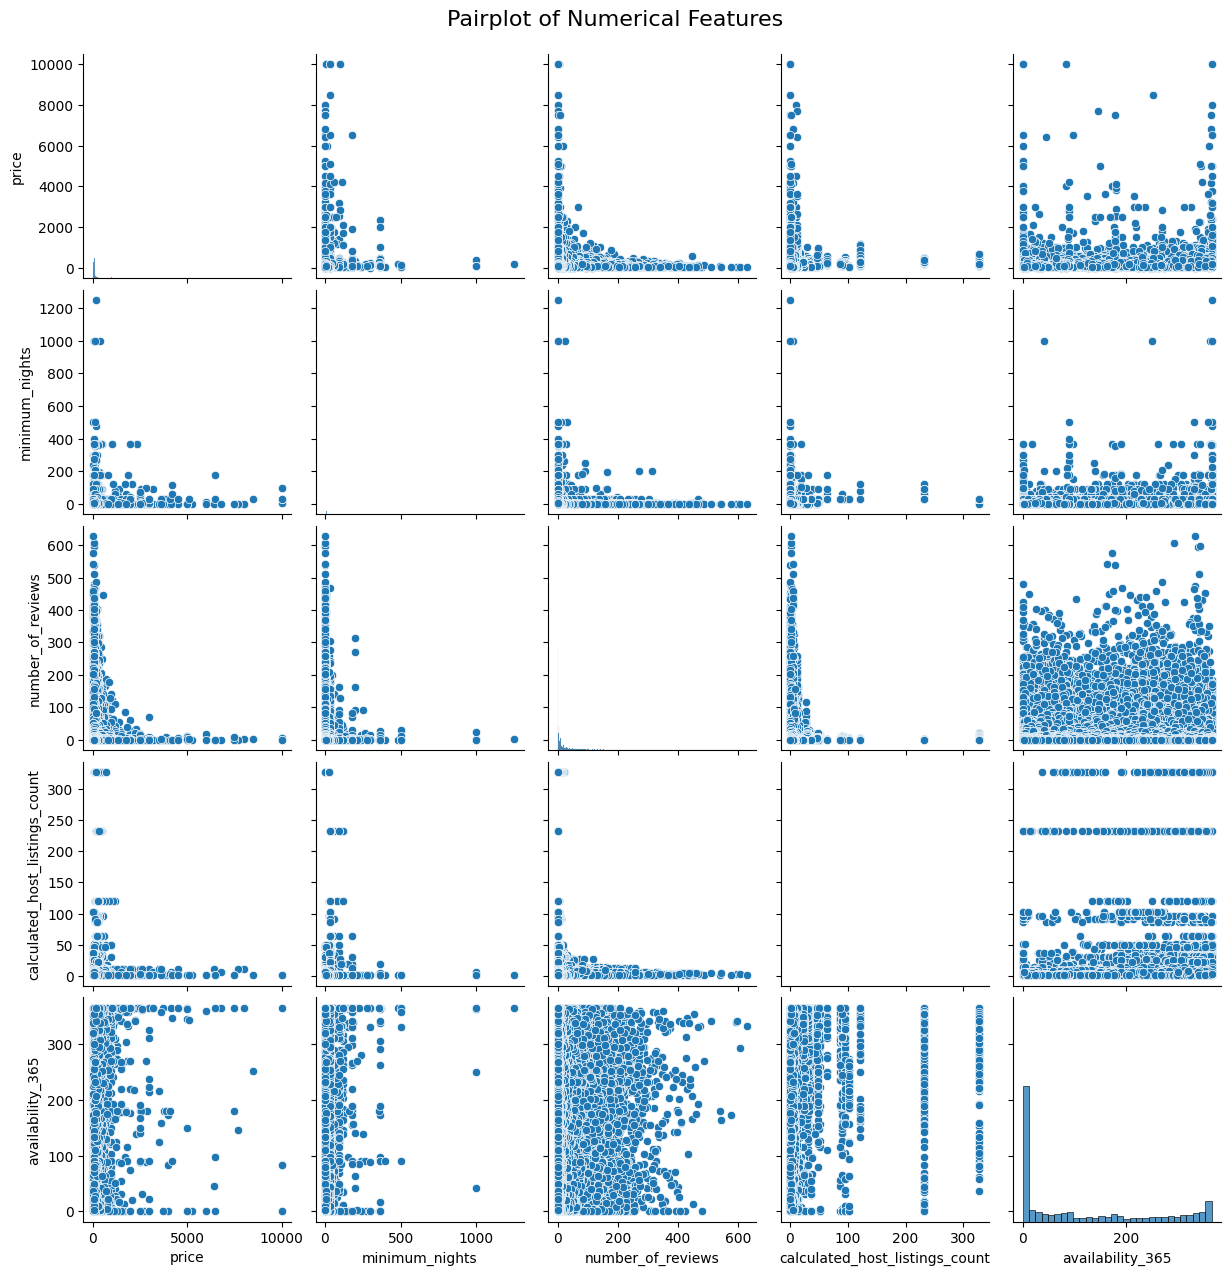

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data = df[numerical_features])
plt.suptitle("Pairplot of Numerical Features", y=1.02, fontsize=16)
plt.show()

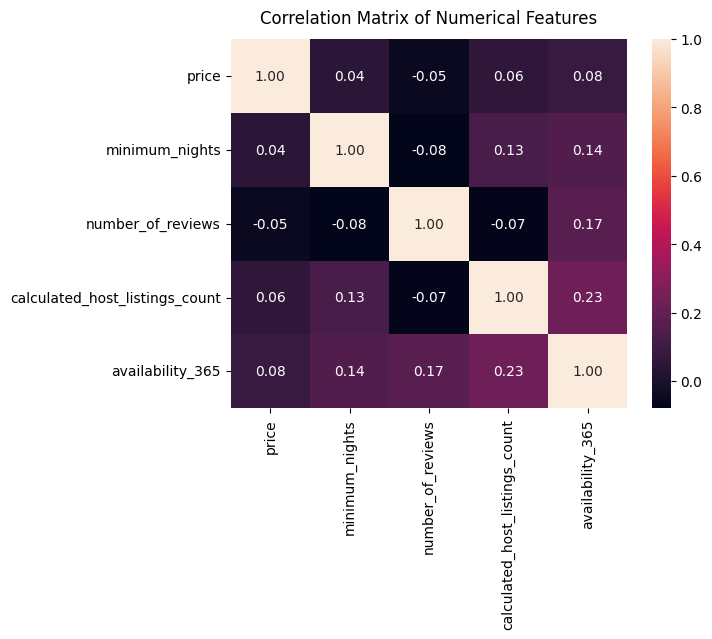

In [23]:
sns.heatmap(df[numerical_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Matrix of Numerical Features", y=1.02)
plt.show()

In [24]:
categorical_features

['neighbourhood_group', 'neighbourhood', 'room_type']

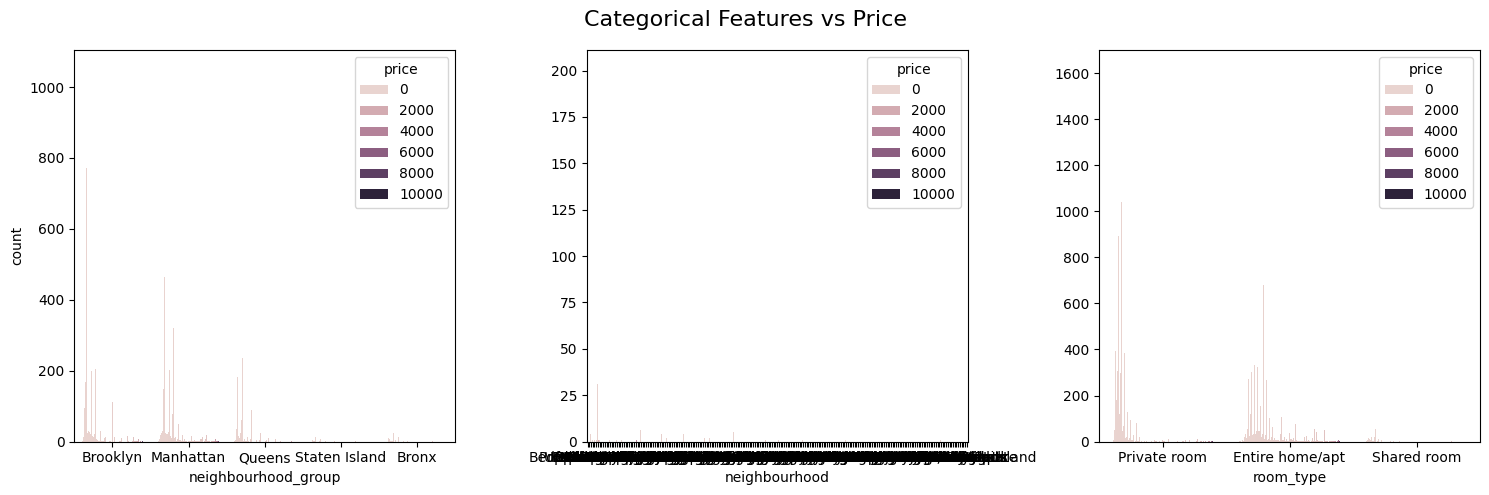

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1,3, figsize = (15, 5))

sns.countplot(ax = axis[0], data = df, x = "neighbourhood_group", hue = "price")
sns.countplot(ax = axis[1], data = df, x = "neighbourhood", hue = "price").set(ylabel = None)
sns.countplot(ax = axis[2], data = df, x = "room_type", hue = "price").set(ylabel = None)

fig.suptitle("Categorical Features vs Price", fontsize=16)
plt.tight_layout()

plt.show()

#### Feature Engineering

In [26]:
df.describe().loc[['mean', 'min', '25%', '75%', 'max']]

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [27]:
categorical_features

['neighbourhood_group', 'neighbourhood', 'room_type']

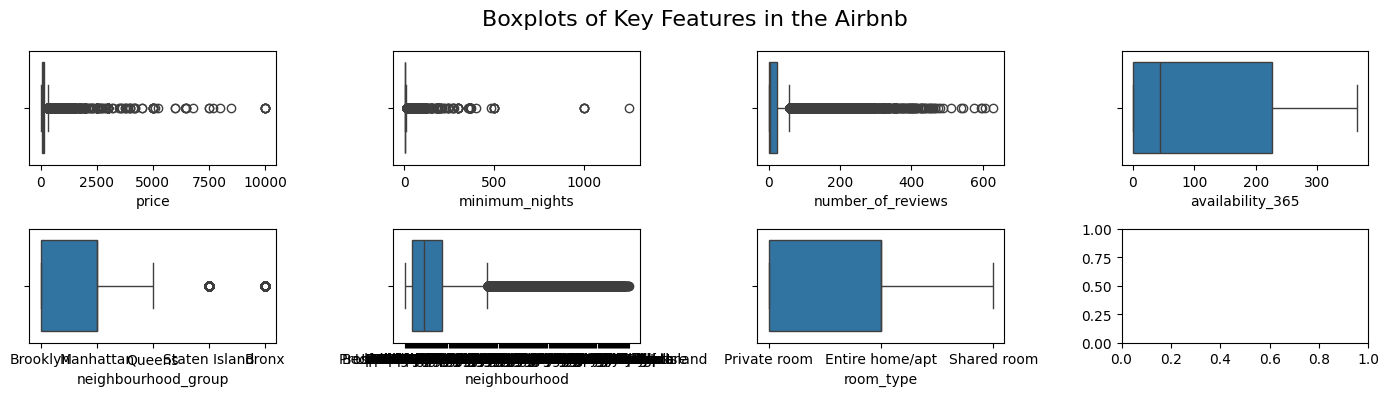

In [28]:
fig, axis = plt.subplots(2, 4, figsize = (14, 4))

sns.boxplot(ax = axis[0, 0], data = df, x = "price")
sns.boxplot(ax = axis[0, 1], data = df, x = "minimum_nights")
sns.boxplot(ax = axis[0, 2], data = df, x = "number_of_reviews")
sns.boxplot(ax = axis[0, 3], data = df, x = "availability_365")
sns.boxplot(ax = axis[1, 0], data = df, x = "neighbourhood_group")
sns.boxplot(ax = axis[1, 1], data = df, x = "neighbourhood")
sns.boxplot(ax = axis[1, 2], data = df, x = "room_type")

fig.suptitle("Boxplots of Key Features in the Airbnb", fontsize=16)
plt.tight_layout()

plt.show()

In [29]:
fare_Q25_from_df = df['price'].quantile(0.25)
fare_Q75_from_df = df['price'].quantile(0.75)

print(f"25% quantile of `price` (using the entire dataset): {fare_Q25_from_df}")
print(f"75% quantile of `price` (using the entire dataset): {fare_Q75_from_df}")

25% quantile of `price` (using the entire dataset): 69.0
75% quantile of `price` (using the entire dataset): 175.0


In [33]:
fare_IQR_from_df = fare_Q75_from_df - fare_Q25_from_df
print(f"IQR of `price` (using the entire dataset): {fare_Q75_from_df} - {fare_Q25_from_df} = {fare_IQR_from_df}")

IQR of `price` (using the entire dataset): 175.0 - 69.0 = 106.0


In [34]:
fare_Q25_from_df = df['price'].quantile(0.25)
fare_Q75_from_df = df['price'].quantile(0.75)

print(f"25% quantile of `price` (using the entire dataset): {fare_Q25_from_df}")
print(f"75% quantile of `price` (using the entire dataset): {fare_Q75_from_df}")

25% quantile of `price` (using the entire dataset): 69.0
75% quantile of `price` (using the entire dataset): 175.0


In [35]:
fare_IQR_from_df = fare_Q75_from_df - fare_Q25_from_df
print(f"IQR of `price` (using the entire dataset): {fare_Q75_from_df} - {fare_Q25_from_df} = {fare_IQR_from_df}")

IQR of `price` (using the entire dataset): 175.0 - 69.0 = 106.0


In [36]:
fare_lower_limit_from_df = fare_Q25_from_df - 1.5 * fare_IQR_from_df
fare_upper_limit_from_df = fare_Q75_from_df + 1.5 * fare_IQR_from_df

print(f"The lower limit for `price` outliers (using the entire dataset): {fare_lower_limit_from_df}")
print(f"The upper limit for `price` outliers (using the entire dataset): {fare_upper_limit_from_df}")

The lower limit for `price` outliers (using the entire dataset): -90.0
The upper limit for `price` outliers (using the entire dataset): 334.0


In [38]:
df[df['price'] > 335]

# get back to this 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,1,9
